<a href="https://colab.research.google.com/github/gaeguriwadukerbi/-zeal/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rabieelkharoua/predict-pet-adoption-status-dataset
!unzip predict-pet-adoption-status-dataset.zip

import pandas as pd

data = pd.read_csv('pet_adoption_data.csv')

print(data.head())
print(data.info())
print(data.describe())

print(data['PetType'].unique())
print(data['Breed'].unique())
print(data['Color'].unique())
print(data['Size'].unique())
print(data['AgeMonths'].unique())
print(data['WeightKg'].unique())
print(data['Vaccinated'].unique())
print(data['HealthCondition'].unique())
print(data['TimeInShelterDays'].unique())
print(data['AdoptionFee'].unique())
print(data['PreviousOwner'].unique())
print(data['AdoptionLikelihood'].unique())

from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
categorical_features = ['PetType', 'Breed', 'Color', 'Size', 'Vaccinated', 'HealthCondition', 'PreviousOwner']
numerical_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

X = data.drop('AdoptionLikelihood', axis=1)
y = data['AdoptionLikelihood']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/43.6k [00:00<?, ?B/s]
100% 43.6k/43.6k [00:00<00:00, 39.3MB/s]
Archive:  predict-pet-adoption-status-dataset.zip
  inflating: pet_adoption_data.csv   
   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1     

In [2]:
# 테스트 데이터에서 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


13/13 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.6716
Test Loss: 0.633069634437561
Test Accuracy: 0.6716417670249939


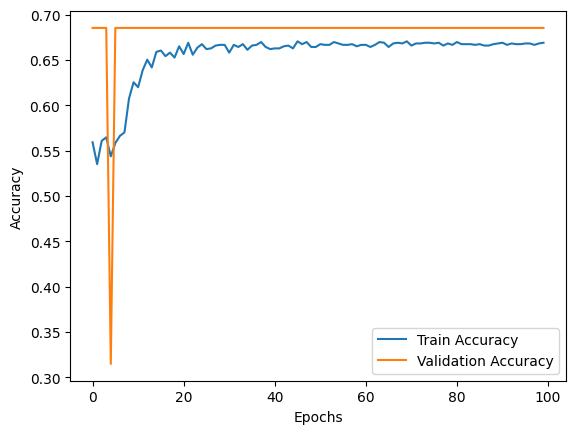

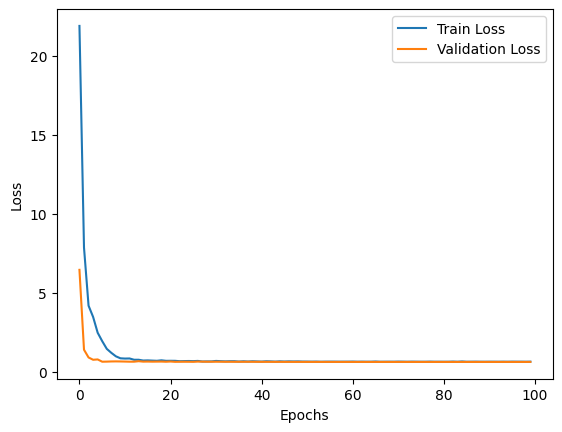

In [3]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
